# **Project 2 Report**

Landon Fox

CS 458

## **P2-1. Decision Tree**

**(a) Develop a decision tree based classifier to classify the 3 different types  of Iris (Setosa, Versicolour, and Virginica).**

In [17]:
# Codes for P2-1(a)
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
iris = load_iris()
x, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
skf = StratifiedKFold( n_splits=5 )
for train, test in skf.split( x, y ):
  clf.fit( x[ train ], y[ train ] )

Discuss how you use 5-fold cross validation to train the classifier here.

To apply 5-fold cross validation, we may use StratifiedKFold which will split the data set into training and testing sets in a balanced manner.

**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree. Plot your decision tree.**

confusion matrix: 
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]

decision tree: 


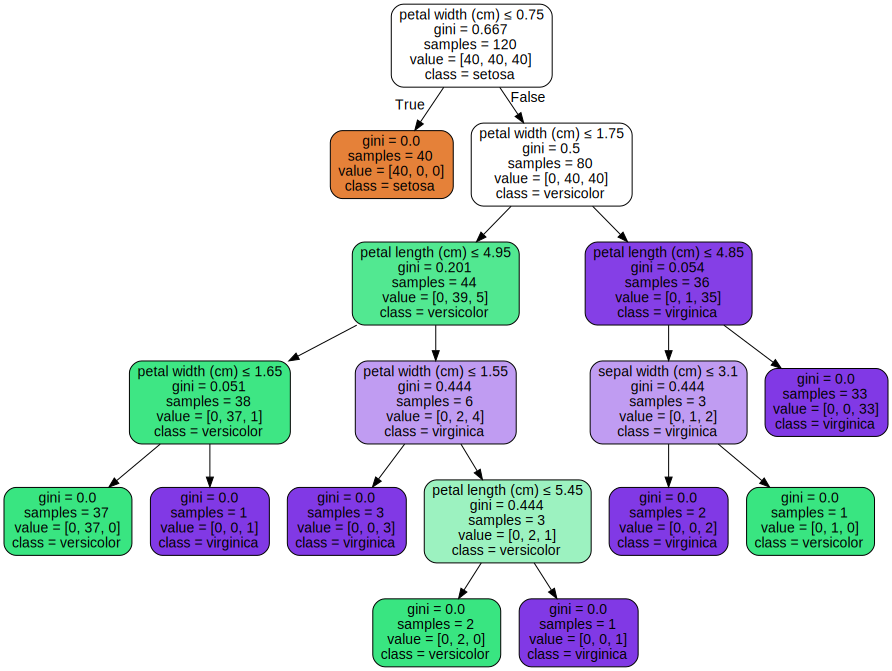

In [18]:
# Codes for P2-1(b)
from sklearn.metrics import confusion_matrix
import graphviz

y_true = []
y_pred = []
for train, test in skf.split( x, y ):
  y_true.extend( y[ test ] )
  y_pred.extend( clf.predict( x[ test ] ) )

print( "confusion matrix: " )
print( confusion_matrix( y_true, y_pred ) )

dot_data = tree.export_graphviz( clf, out_file=None )
graph = graphviz.Source( dot_data )
graph.render( "iris" )

print( "\ndecision tree: " )
dot_data = tree.export_graphviz(
  clf,
  out_file=None,
  feature_names=iris.feature_names,
  class_names=iris.target_names,
  filled=True,
  rounded=True,
  special_characters=True
)
graphviz.Source( dot_data )

Discuss how you optimize the parameters of your decision tree here.

As we can see by the confusion matrix above, it has 100% accuracy on the test data set. I performed no manual optimization on the tree to achieve this.

# **P2-2. Model Overfitting**

**(a) Generate the dataset as in slide 56 in Chapter 3**

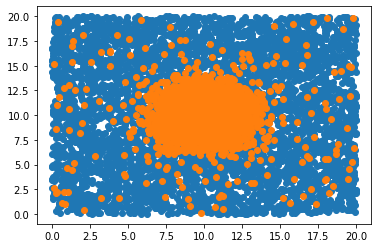

In [19]:
# Codes for P2-2(a)
import matplotlib.pyplot as plt

x_class1a, y_class1a = np.random.multivariate_normal( [ 10, 10 ], [ [ 2, 0 ], [ 0, 2 ] ], 5000 ).T
x_class1b, y_class1b = ( np.random.random( ( 200, 2 ) ) * 20 ).T
x_class1, y_class1 = np.concatenate( ( x_class1a, x_class1b ), axis=0 ), np.concatenate( ( y_class1a, y_class1b ), axis=0 )
x_class2, y_class2 = ( np.random.random( ( 5200, 2 ) ) * 20 ).T

plt.scatter( x_class2, y_class2 )
plt.scatter( x_class1, y_class1 )
plt.show()

**(b) Randomly select 10% of the data as test dataset and the remaining 90% of the data as training dataset. Train decision trees by increasing the number of nodes of the decision trees until the training error becomes 0. Plot the training errors and the testing errors under different numbers of nodes and explain the model underfitting and model overfitting.**

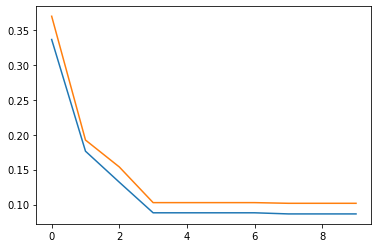

In [20]:
# Codes for P2-2(b)
import random

points = list( zip( x_class1, y_class1 ) )
points.extend( list( zip( x_class2, y_class2 ) ) )
labels = ( [ 0 ] * len( x_class1 ) )
labels.extend( [ 1 ] * len( x_class2 ) )
map_index = list( zip( points, labels ) )
random.shuffle( map_index )
points, labels = zip( *map_index )

points_test = points[ :int( 0.1 * len( points ) ) ]
labels_test = labels[ :int( 0.1 * len( labels ) ) ]
points_train = points[ int( 0.1 * len( points ) ): ]
labels_train = labels[ int( 0.1 * len( labels ) ): ]

acc_train = []
acc_test = []
for k in range( 2, 200 ):
  clf = tree.DecisionTreeClassifier( max_leaf_nodes=k )
  clf.fit( points_train, labels_train )
  acc_train.append( 1 - clf.score( points_train, labels_train ) )
  acc_test.append( 1 - clf.score( points_test, labels_test ) )

plt.plot( acc_train[ :10 ] )
plt.plot( acc_test[ :10 ] )

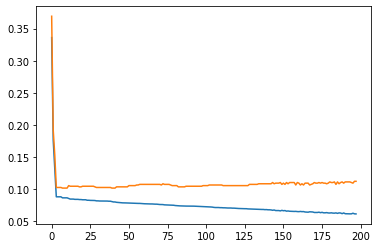

In [21]:
plt.plot( acc_train )
plt.plot( acc_test )

Explain the model underfitting and model overfitting here.

With underfitting, we can see that the error is consistently significant, despite it matching the error rate of the training data. This is because the decision tree is not complex enough to classify the data. More nodes are required properly distinguish the classes. As for overfitting, we can see that the training error rate is quite successful, yet the test error rate has the opposite affect as we increase the number of leaves. Moreover, the tree is too well fitted to the training data, fitting around the exact shape of the training data as opposed to the general region in which the data lies.

# **P2-3. Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']. Print the number of documents in the training dataset and the test dataset. Print the number of attributes in the training dataset.**

In [22]:
# Codes for P2-3(a)
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
news = fetch_20newsgroups( categories=[ 'rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space' ] )
news_vectors = TfidfVectorizer().fit_transform( news.data )
data = news_vectors.toarray()

In [23]:
print( 'Number of articles: ' + str( len( news.data ) ) )
print( 'Number of attributes in each article: ' + str( len( data[ 0 ] ) ) )

Number of articles: 2148
Number of attributes in each article: 34948


**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree.**

In [24]:
# Codes for P2-3(b)
clf_ = tree.DecisionTreeClassifier()
clf_.fit( data, news.target )
perdicted = clf_.predict( data )

confusion_matrix( perdicted, news.target )

array([[584,   0,   0,   0],
       [  0, 594,   0,   0],
       [  0,   0, 593,   0],
       [  0,   0,   0, 377]])

Discuss how you optimize the parameters of your decision tree here.

As before, the above was optimized using the DecisionTreeClassifier() function.